In [ ]:
from utils import visualize_results
import torch
import numpy as np
from models import ColorizingNet
from utils import ColirizationDataset
from PIL import Image
from torchvision import transforms
import os

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ColorizingNet(device)
model.load_state_dict(torch.load('best_colorization_model.pth'))

<All keys matched successfully>

In [3]:
train_dir = 'data/train2017'
val_dir = 'data/val2017'
transformation = transforms.Compose([
    transforms.Resize((256, 256), Image.BICUBIC),
    transforms.ToTensor(),
])
imgs_val = np.random.choice(os.listdir(val_dir), 1000).tolist()
imgs_val = [os.path.join(val_dir, img) for img in imgs_val]
val_dataset = ColirizationDataset(imgs_val, transformation)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)

(16, 1, 256, 256) (16, 2, 256, 256) (16, 2, 256, 256)
(8, 3, 256, 256) (8, 3, 256, 256)
Shape of gray_imgs: (1, 256, 256)
Shape of true_color_imgs: (2, 256, 256)
Shape of pred_color_imgs: (2, 256, 256)
Shape of true_rgb_image: (256, 256, 3)
Shape of pred_rgb_image: (256, 256, 3)
Shape of imgs: torch.Size([16, 3, 256, 256])


<Figure size 2000x2000 with 0 Axes>

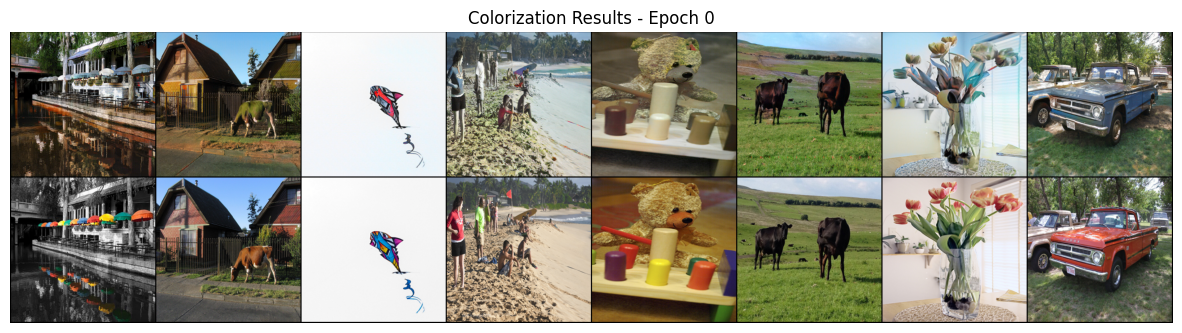

In [7]:
visualize_results(model, val_loader, device, 0, show=True, num_images=8)